# Clustering Crypto

In [37]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [39]:
# Load the crypto_data.csv dataset.
df = pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [40]:
df = df.set_index('Unnamed: 0')
df = df.rename_axis(index=None)
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [41]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = df[df['IsTrading']==True]
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [42]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df = crypto_df[crypto_df['Algorithm'].notnull()]
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [43]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(columns=['IsTrading'])
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [44]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [45]:
# Keep the rows where coins are mined.
new_df = crypto_df[crypto_df['TotalCoinsMined']>0]
new_df 

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [46]:
# Create a new DataFrame that holds only the cryptocurrencies names.
name_df=new_df.filter(items = ['CoinName'])
name_df

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [47]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
new_df= new_df.drop(columns = ['CoinName'])
new_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [48]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(new_df,columns=['Algorithm','ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Standardize the data with StandardScaler().
x_scaled =StandardScaler().fit_transform(X)
x_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [50]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components = 3)

crypto_pca = pca.fit_transform(x_scaled)

In [51]:
# Create a DataFrame with the three principal components.
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["PC1", "PC2","PC3"]
)


df_crypto_pca.index = new_df.index

df_crypto_pca

,PC1,PC2,PC3
42,-0.327987,1.043412,-0.569601
404,-0.311343,1.043250,-0.569841
1337,2.288132,1.595371,-0.517507
BTC,-0.154385,-1.342252,0.180322
ETH,-0.151190,-1.996297,0.367574
...,...,...,...
ZEPH,2.472161,0.940846,-0.078124
GAP,-0.326035,1.043259,-0.569613
BDX,0.324170,-2.302365,0.393439
ZEN,-0.164656,-1.987591,0.413682


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\tonja\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


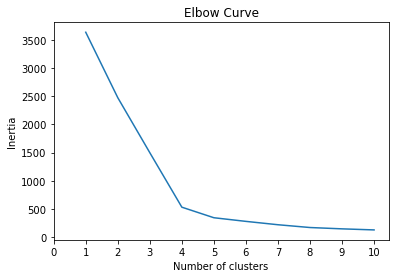

In [52]:
# Create an elbow curve to find the best value for K.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
k = list(range(1,11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Running K-Means with `k=4`

In [53]:
# Initialize the K-Means model.

model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_crypto_pca)

# Predict clusters

predictions = model.predict(df_crypto_pca)
print(predictions)

[0 0 0 3 3 3 0 3 3 3 0 3 0 0 3 0 3 3 0 0 3 3 3 3 3 0 3 3 3 0 3 0 3 3 0 0 3
 3 3 3 3 3 0 0 3 3 3 3 3 0 0 3 0 3 3 3 3 0 3 3 0 3 0 0 0 3 3 3 0 0 0 0 0 3
 3 3 0 0 3 0 3 0 0 3 3 3 3 0 0 3 0 3 3 0 0 3 0 0 3 3 0 0 3 0 0 3 0 3 0 3 0
 3 0 0 3 3 0 3 3 3 0 3 3 3 3 3 0 0 3 3 3 0 3 0 3 3 0 3 0 3 0 0 3 3 0 3 3 0
 0 3 0 3 0 0 0 3 3 3 3 0 0 0 0 0 3 3 0 0 0 0 0 3 0 0 0 0 0 3 0 3 0 0 3 0 3
 0 0 3 0 3 0 3 0 3 0 0 0 0 3 0 0 0 0 0 3 3 0 0 3 3 0 0 0 0 0 3 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 0 3 3 3 0 0 0 0 3 0 3 0 0 3 0 3 3 0 3 3 0 3 0 0 0 3 0 0 3
 0 0 0 0 0 0 0 3 0 3 0 0 0 0 3 0 3 0 3 3 3 3 0 3 0 0 3 0 3 3 3 0 3 0 3 3 3
 0 3 0 3 0 0 0 3 0 3 3 3 3 3 0 0 3 0 0 0 3 0 3 0 3 0 3 0 0 0 0 3 0 0 3 0 0
 0 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 3 3 0 0 3 0 3 3 3 0 3 3 0 0 0 3 3 3 0 3 0
 3 3 0 3 3 3 3 0 0 1 3 3 3 0 1 0 0 0 0 3 3 3 3 0 0 0 3 0 3 0 0 0 0 3 0 0 3
 0 0 3 3 0 3 0 3 3 3 3 0 0 3 0 3 0 0 0 0 0 0 3 3 3 0 0 0 0 0 0 3 0 3 3 3 3
 0 0 0 0 3 0 0 3 0 0 3 0 3 0 3 3 0 0 3 0 3 3 3 3 3 0 3 0 3 0 0 3 0 0 0 0 0
 3 3 3 0 0 0 3 0 3 0 3 0 

In [54]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.

clustered_df = new_df.join(df_crypto_pca,how='inner')

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies.
clustered_df['CoinName']=name_df['CoinName']

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class']=predictions 

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.327987,1.043412,-0.569601,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.311343,1.043250,-0.569841,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.288132,1.595371,-0.517507,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.154385,-1.342252,0.180322,Bitcoin,3
ETH,Ethash,PoW,1.076842e+08,0,-0.151190,-1.996297,0.367574,Ethereum,3
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.155417,-1.122113,-0.058861,Litecoin,3
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.403620,1.305781,-0.412009,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.141623,-2.211184,0.400336,Monero,3
ETC,Ethash,PoW,1.133597e+08,210000000,-0.149633,-1.996427,0.367566,Ethereum Classic,3
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.164655,-1.987591,0.413682,ZCash,3


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [55]:
# Creating a 3D-Scatter with the PCA data and the clusters
import plotly.express as px
import hvplot.pandas

fig = px.scatter_3d(clustered_df,
                   x= 'PC1',
                   y='PC2',
                   z='PC3',
                   color="Class",
                   symbol="Class",
                   width = 800,
                 )

fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [56]:
# Create a table with tradable cryptocurrencies.

tradable_df=clustered_df.filter(items = ['CoinName','Algorithm','ProofType','TotalCoinSupply','TotalCoinsMined','Class'])
tradable_df.hvplot.table()

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [57]:
# Print the total number of tradable cryptocurrencies.
print(f"The Total number of tradable cryprocurrencies: {len(clustered_df)}")

The Total number of tradable cryprocurrencies: 532


In [58]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# YOUR CODE HERE
X = new_df.drop(['Algorithm','ProofType'],axis=1)

X_scaled = X_scaled = MinMaxScaler().fit_transform(X)

X_scaled

array([[0.00000000e+00, 4.20000000e-11],
       [1.06585544e-03, 5.32000000e-04],
       [2.95755135e-02, 3.14159265e-01],
       ...,
       [9.90135079e-04, 1.40022261e-03],
       [7.37028150e-06, 2.10000000e-05],
       [1.29582282e-07, 1.00000000e-06]])

In [59]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.

plot_df= pd.DataFrame(
  X_scaled, columns=['TotalCoinSupply','TotalCoinsMined'],index=clustered_df.index
)
# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.

plot_df= plot_df.join(name_df, how='inner')


# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class']=clustered_df['Class']

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,0.000000,4.200000e-11,42 Coin,0
404,0.001066,5.320000e-04,404Coin,0
1337,0.029576,3.141593e-01,EliteCoin,0
BTC,0.000018,2.100000e-05,Bitcoin,3
ETH,0.000109,0.000000e+00,Ethereum,3
LTC,0.000064,8.400000e-05,Litecoin,3
DASH,0.000009,2.200000e-05,Dash,0
XMR,0.000017,0.000000e+00,Monero,3
ETC,0.000115,2.100000e-04,Ethereum Classic,3
ZEC,0.000007,2.100000e-05,ZCash,3


In [60]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(x='TotalCoinSupply', y='TotalCoinsMined', hover_cols=["CoinName"], by='Class')


:NdOverlay   [Class]
   :Scatter   [TotalCoinSupply]   (TotalCoinsMined,CoinName)